In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('parking-klcc-2016-2017.txt', sep=';', names = ['location','avail_park','datetime'])
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['week'] = df['datetime'].dt.weekday

df = df[(df['datetime'] >= '2016-11-15') & (df['datetime'] < '2017-11-15')]
df.loc[df['avail_park'] == 'FULL', 'avail_park'] = '0'
df_open_full = df[(df['avail_park'] != 'OPEN')]

# Histogram Graph from 15 November 2016 to 14 November 2016

In [3]:
df_open_full['avail_park'] = df_open_full['avail_park'].astype(int)

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


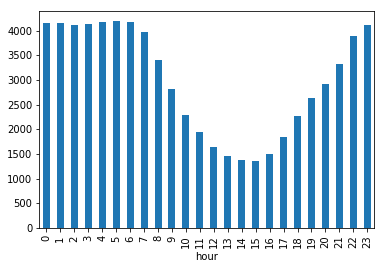

In [4]:
df_open_full.groupby('hour')['avail_park'].mean().plot(kind='bar');

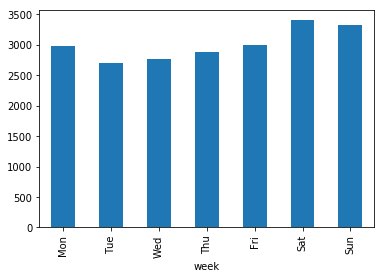

In [5]:
df_open_full.groupby('week')['avail_park'].mean().plot(kind='bar')
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split());

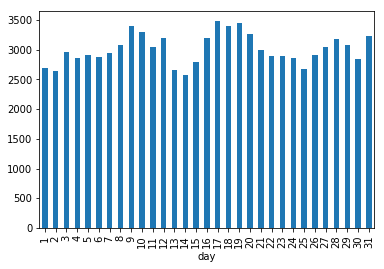

In [6]:
df_open_full.groupby('day')['avail_park'].mean().plot(kind='bar');

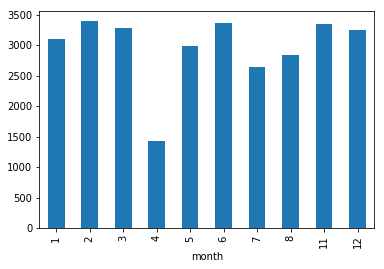

In [7]:
df_open_full.groupby('month')['avail_park'].mean().plot(kind='bar');

# Histogram Graph from 15 November 2016 to 14 November 2016 - FULL Parking

In [8]:
df_full = df_open_full[df_open_full['avail_park'] == 0]

In [9]:
df_full.head()

,location,avail_park,datetime,hour,day,month,week
14428,KLCC,0,2016-11-15 13:30:03,13,15,11,1
14429,KLCC,0,2016-11-15 14:00:03,14,15,11,1
14430,KLCC,0,2016-11-15 14:15:03,14,15,11,1
14431,KLCC,0,2016-11-15 14:30:03,14,15,11,1
15029,KLCC,0,2016-11-22 12:30:02,12,22,11,1


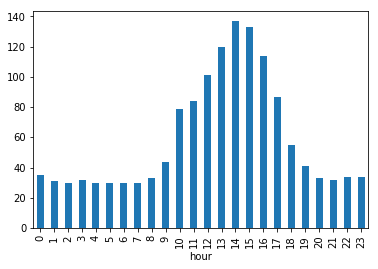

In [13]:
df_full.groupby('hour')['avail_park'].count().plot(kind='bar');

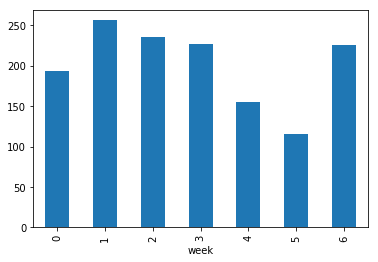

In [12]:
df_full.groupby('week')['avail_park'].count().plot(kind='bar');

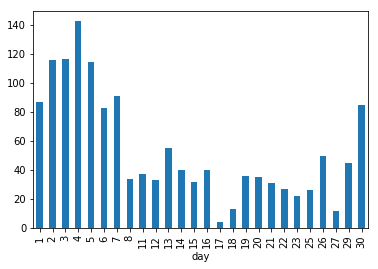

In [11]:
df_full.groupby('day')['avail_park'].count().plot(kind='bar');

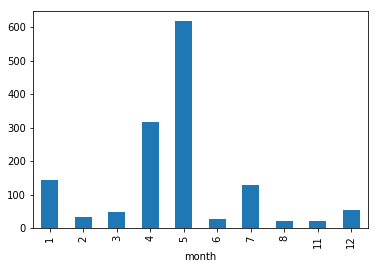

In [10]:
df_full.groupby('month')['avail_park'].count().plot(kind='bar');